<div class="header">
D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Analisi di classificatori.
</div>
<hr style="width: 90%;" align="left" />

<div id="h-0"></div>

# Analisi di classificatori

<div id="h-1"></div>

## Sensibilità e specificità

Immaginiamo di avere a disposizione un classificatore _binario_, costruito cioè per discriminare tra due classi che convenzionalmente indicheremo come _positiva_ e _negativa_. A partire da un insieme di oggetti di cui è noto a priori l'esito della classificazione (useremo la dicitura _oggetti positivi_ e _oggetti negativi_ per indicare gli oggetti che appartengono alle due classi), possiamo valutare la bontà di questo classificatore calcolando il numero di casi (o la corrispondente frazione) che vengono classificati in modo errato. Notiamo però che ci sono due possibili modi di sbagliare la classificazione:

- un esempio positivo viene classificato come negativo, dando luogo a un cosiddetto _falso negativo_;
- un esempio negativo viene classificato come positivo, e in questo caso si parla di _falso positivo_.

In alcuni casi il peso dato a un errore che coinvolge un falso positivo equivale a quello dato a un falso negativo, ma non è sempre così. Se per esempio il procedimento di classificazione mira a determinare i portatori di una grave malattia contagiosa, un falso positivo sta a indicare un individuo sano che viene erroneamente classificato come malato, e quindi posto ingiustamente in isolamento; un falso negativo corrisponde invece a un individuo contagioso classificato come sano e quindi a una falla nel contenimento di una potenziale epidemia. Un altro esempio, meno drammatico, è costituito dai cosiddetti _sistemi di raccomandazione_ utilizzati dai rivenditori per suggerire servizi o prodotti ai propri clienti (quando si collegano al sito del rivenditore, o tramite mail, o con buoni stampati alla cassa). In questo caso un falso negativo corrisponde a un prodotto che interesserebbe al cliente ma che non gli viene consigliato (e, a patto che gli vengano consigliati altri prodotti sensati, ciò non costituisce di norma un errore grave), mentre un falso positivo indica un prodotto consigliato che però il cliente non gradisce, e quindi costituisce un errore sicuramente più grave rispetto al caso precedente.

Tenuto anche conto del fatto che tipicamente è molto difficile riuscire a ottenere un buon classificatre in termine sia di falsi positivi, sia di falsi negativi, un modo efficace di valutare entrambi questi tipi di errore consiste nel disegnare la _matrice di confusione_ (o _tabella di confusione_)

<table class="table">
  <caption>Matrice di confusione
  di un classificatore binario</caption>
  <tr style="background: none;">
    <th style="border-top: none;"></th>
    <th style="border-top: none;"></th>
    <th colspan="2"
        style="border-top: none; text-align: center;
               font-weight: bold;">Valore effettivo</th>
    <th style="border-top: none;"></th>
  </tr>
  <tr>
    <td style="border-top: none;"></td>
    <td style="border-top: none;"></td>
    <td style="text-align: center;
               font-weight: bold;">Positivo</td>
    <td style="text-align: center;
               font-weight: bold;">Negativo</td>
  </tr>
  <tr style="background: none;">
    <th rowspan="2"
        style="border-top: none; text-align: center;
        vertical-align: middle;
        -webkit-transform: rotate(-90deg);
        -moz-transform: rotate(-90deg);
        -ms-transform: rotate(-90deg);
        -o-transform: rotate(-90deg);">
        Esito della classificazione</th>
    <td style="text-align: center; font-weight: bold;
        vertical-align: middle;">Positivo</td>
    <td style="text-align: center;
        vertical-align: middle;">Veri positivi (VP)</td>
    <td style="text-align: center;
               vertical-align: middle;">Falsi positivi (FP)</td>
    <td style="text-align: center;">
    Totale classificati come positivi</td>
  </tr>
  <tr>
    <td style="text-align: center; font-weight: bold;
               vertical-align: middle;">Negativo</td>
    <td style="text-align: center;">Falsi negativi (FN)</td>
    <td style="text-align: center;">Veri negativi (VN)</td>
    <td style="text-align: center;">
    Totale classificati come negativi</td>
  </tr>
  <tr style="background: none;">
    <td></td>
    <td></td>
    <td style="text-align: center;">Totale positivi: (TP)</td>
    <td style="text-align: center;">Totale negativi: (TN)</td>
    <td style="text-align: center;">Totale casi</td>
  </tr>
</table>

A partire dalla matrice di confusione è possibile derivare due indici che valutano separatamente la capacità del classificatore a lavorare correttamente con gli oggetti positivi e con quelli negativi:

- la _sensibilità_, intesa come frazione degli oggetti positivi che vengono correttamente classificati

\begin{equation}
\mathrm{sensibilità} = \frac{\mathrm{VP}}{\mathrm{TP}},
\end{equation}

- la _specificità_, analaogamente intesa come frazione degli oggetti negativi che vengono correttamente classificati

\begin{equation}
\mathrm{specificità} = \frac{\mathrm{VN}}{\mathrm{TN}}.
\end{equation}

Una volta calcolati i valori per questi due indici, è possibile valutare il classificatore in funzione della posizione assunta dal punto di coordinate $(1 - \mathrm{specificità}, \mathrm{sensibilità})$ sul piano cartesiano. In termini delle quantità sopra definite, le coordinate coincidono con $\left(1 - \frac{VN}{TN}, \frac{VP}{TP}\right)$, o equivalentemente con $\left(\frac{FP}{TN}, \frac{VP}{TP}\right)$. Vediamo nel seguito alcuni casi speciali.

<div id="h-2"></div>

### Classificatori costanti

Consideriamo il classificatore $\mathrm{CP}$ che associa indiscriminatamente gli oggetti nella classe positiva. La corrispondente matrice di confusione sarà la seguente.

<table class="table">
  <caption>Matrice di confusione
  del classificatore $\mathrm{CP}$</caption>
  <tr style="background: none;">
    <th style="border-top: none;"></th>
    <th style="border-top: none;"></th>
    <th colspan="2"
        style="border-top: none; text-align: center;
               font-weight: bold;">Valore effettivo</th>
  </tr>
  <tr>
    <td style="border-top: none;"></td>
    <td style="border-top: none;"></td>
    <td style="text-align: center;
               font-weight: bold;">Positivo</td>
    <td style="text-align: center;
               font-weight: bold;">Negativo</td>
  </tr>
  <tr style="background: none;">
    <th rowspan="2"
        style="border-top: none; text-align: center;
        vertical-align: middle;
        -webkit-transform: rotate(-90deg);
        -moz-transform: rotate(-90deg);
        -ms-transform: rotate(-90deg);
        -o-transform: rotate(-90deg);">
        Esito della classificazione</th>
    <td style="text-align: center; font-weight: bold;
               vertical-align: middle;">Positivo</td>
    <td style="text-align: center;vertical-align: middle;">TP</td>
    <td style="text-align: center;vertical-align: middle;">TN</td>
  </tr>
  <tr>
    <td style="text-align: center; font-weight: bold;
               vertical-align: middle;">Negativo</td>
    <td style="text-align: center;">0</td>
    <td style="text-align: center;">0</td>
  </tr>
</table>

Tutti i $\mathrm{TP}$ oggetti positivi verranno assegnati (correttamente) alla classe positiva, e tutti i $\mathrm{TN}$ oggetti negativi saranno assegnati (erroneamente) alla classe positiva. Ciò significa che il numero di veri positivi sarà pari a $\mathrm{TP}$ e il numero di veri negativi sarà zero: pertanto la sensibilità sarà uguale a $1$ (com'è giusto che sia: tutti gli oggetti sono classificati come positivi e quindi il 100% degli oggetti positivi viene correttamente classificato) mentre la specificità sarà nulla (nessun oggetto negativo verrà classificato come tale). Il classificatore $\mathrm{CP}$ individuerà quindi il punto di coordinate $(1-\mathrm{specificità}, \mathrm{sensibilità}) = (1, 1)$.

Il classificatore $\mathrm{CN}$ che associa tutti gli oggetti alla classe negativa si comporta in modo duale rispetto a $\mathrm{CP}$, e la sua matrice di confusione è la seguente.

<table class="table">
<caption>Matrice di confusione
  del classificatore $\mathrm{CN}$</caption>
  <tr style="background: none;">
    <th style="border-top: none;"></th>
    <th style="border-top: none;"></th>
    <th colspan="2"
        style="border-top: none; text-align: center;
               font-weight: bold;">Valore effettivo</th>
  </tr>
  <tr>
    <td style="border-top: none;"></td>
    <td style="border-top: none;"></td>
    <td style="text-align: center;
               font-weight: bold;">Positivo</td>
    <td style="text-align: center;
               font-weight: bold;">Negativo</td>
  </tr>
  <tr style="background: none;">
    <th rowspan="2"
        style="border-top: none; text-align: center;
        vertical-align: middle;
        -webkit-transform: rotate(-90deg);
        -moz-transform: rotate(-90deg);
        -ms-transform: rotate(-90deg);
        -o-transform: rotate(-90deg);">
        Esito della classificazione</th>
    <td style="text-align: center; font-weight: bold;
               vertical-align: middle;">Positivo</td>
    <td style="text-align: center;vertical-align: middle;">0</td>
    <td style="text-align: center;vertical-align: middle;">0</td>
  </tr>
  <tr>
    <td style="text-align: center; font-weight: bold;
               vertical-align: middle;">Negativo</td>
    <td style="text-align: center;">TP</td>
    <td style="text-align: center;">TN</td>
  </tr>
</table>

Così come risultano invertite le righe della matrice di confusione, si invertono anche i valori per gli indici considerati: la sensibilità si annulla e la specificità vale $1$, pertanto $\mathrm{CN}$ individuerà il punto $(0, 0)$ sul piano cartesiano. I due classificatori costanti considerati si collocano quindi in corrispondenza di due dei quattro vertici del quadrato, come mostrato nella figura seguente all'interno della quale è stata evidenziata anche la diagonale del quadrato, che ci servierà come punto di riferimento.

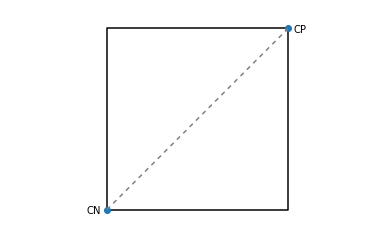

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')
plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color='black')
plt.plot([0, 1], [0, 1], 'o')
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')
plt.text(-.07, 0, '$\mathrm{CN}$', horizontalalignment='center', verticalalignment='center')
plt.text(1.07, 1, '$\mathrm{CP}$', horizontalalignment='center', verticalalignment='center')
plt.xlim([-.1, 1.1])
plt.ylim([-.1, 1.1])
plt.axis('off')
plt.show()

<div id="h-3"></div>

### Classificatori ideali

Ha senso chiedersi se i due vertici del quadrato rimasti scoperti siano anch'essi in corrispondenza di classificatori particolari. Prendiamo per esempio in esame il vertice di coordinate $(0, 1)$: per come sono state costruite queste coordinate sappiamo che la sensibilità e la specificità del classificatore dovranno essere entrambe uguali a $1$. Ciò significa che il 100% dei valori positivi verrà correttamente classificata, e lo stesso varrà per gli oggetti negativi. Siamo in altre parole di fronte a un _classificatore ideale_ che non commetta alcun errore, la cui matrice di confusione è illustrata qui sotto.

<table class="table">
  <tr style="background: none;">
    <th style="border-top: none;"></th>
    <th style="border-top: none;"></th>
    <th colspan="2" style="border-top: none; text-align: center; font-weight: bold;">Valore effettivo</th>
  </tr>
  <tr>
    <td style="border-top: none;"></td>
    <td style="border-top: none;"></td>
    <td style="text-align: center; font-weight: bold;">Positivo</td>
    <td style="text-align: center; font-weight: bold;">Negativo</td>
  </tr>
  <tr style="background: none;">
    <td rowspan="2" style="border-top: none; text-align: center; vertical-align: middle;">Esito della classificazione</td>
    <td style="text-align: center; font-weight: bold; vertical-align: middle;">Positivo</td>
    <td style="text-align: center;vertical-align: middle;">TP</td>
    <td style="text-align: center;vertical-align: middle;">0</td>
  </tr>
  <tr>
    <td style="text-align: center; font-weight: bold; vertical-align: middle;">Negativo</td>
    <td style="text-align: center;">0</td>
    <td style="text-align: center;">TN</td>
  </tr>
</table>

Per quel che riguarda il vertice rimanente, l'ascissa unitaria e l'ordinata uguale a $0$ corrisponderanno a un valore nullo sia per la specificità, sia per la sensibilità. Nessun punto verrà quindi correttamente classificato e tutti gli oggetti considerati daranno luogo ad errori di classificazione. La matrice di confusione che ne risulta è la seguente.

<table class="table">
  <tr style="background: none;">
    <th style="border-top: none;"></th>
    <th style="border-top: none;"></th>
    <th colspan="2" style="border-top: none; text-align: center; font-weight: bold;">Valore effettivo</th>
  </tr>
  <tr>
    <td style="border-top: none;"></td>
    <td style="border-top: none;"></td>
    <td style="text-align: center; font-weight: bold;">Positivo</td>
    <td style="text-align: center; font-weight: bold;">Negativo</td>
  </tr>
  <tr style="background: none;">
    <td rowspan="2" style="border-top: none; text-align: center; vertical-align: middle;">Esito della classificazione</td>
    <td style="text-align: center; font-weight: bold; vertical-align: middle;">Positivo</td>
    <td style="text-align: center;vertical-align: middle;">0</td>
    <td style="text-align: center;vertical-align: middle;">TN</td>
  </tr>
  <tr>
    <td style="text-align: center; font-weight: bold; vertical-align: middle;">Negativo</td>
    <td style="text-align: center;">TP</td>
    <td style="text-align: center;">0</td>
  </tr>
</table>

Ci troviamo dunque di fronte a un classificatore totalmente errato, a partire dal quale è però sorprendentemente facile ottenere il classificatore ideale invertendo gli esiti della classificazione: ogni qual volta un oggetto verrebbe classificato come negativo lo si associa alla classe positiva e viceversa. Se indichiamo rispettivamente con $\mathrm{CI}$ e $\mathrm{CE}$ i classificatori ideale ed errato, possiamo aggiornare la rappresentazione sul piano cartesiano nel modo che segue.

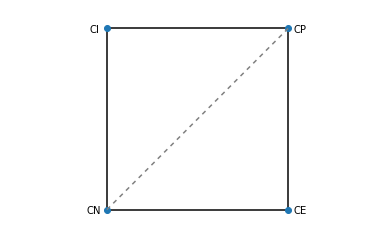

In [2]:
plt.axis('equal')
plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color='black')
plt.plot([0, 1, 0, 1], [0, 1, 1, 0], 'o')
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')
plt.text(-.07, 0, '$\mathrm{CN}$', horizontalalignment='center', verticalalignment='center')
plt.text(1.07, 1, '$\mathrm{CP}$', horizontalalignment='center', verticalalignment='center')
plt.text(-.07, 1, '$\mathrm{CI}$', horizontalalignment='center', verticalalignment='center')
plt.text(1.07, 0, '$\mathrm{CE}$', horizontalalignment='center', verticalalignment='center')
plt.xlim([-.1, 1.1])
plt.ylim([-.1, 1.1])
plt.axis('off')
plt.show()

<div id="h-4"></div>

### Classificatori casuali

Prendiamo ora in considerazione un classificatore che corrisponde al punto $(\frac{1}{2}, \frac{1}{2})$. Sensibilità e specificità sono entrambe uguali a $\frac{1}{2}$, e dunque metà degli oggetti positivi e metà di quelli negativi vengono classificati correttamente (il che significa che le due rimanenti metà vengono classificate male). La matrice di confusione che ne segue è la seguente.

<table class="table">
  <caption>Matrice di confusione
  del classificatore $\mathrm{CC}_{1/2}$</caption>
  <tr style="background: none;">
    <th style="border-top: none;"></th>
    <th style="border-top: none;"></th>
    <th colspan="2" style="border-top: none; text-align: center; font-weight: bold;">Valore effettivo</th>
  </tr>
  <tr>
    <td style="border-top: none;"></td>
    <td style="border-top: none;"></td>
    <td style="text-align: center; font-weight: bold;">Positivo</td>
    <td style="text-align: center; font-weight: bold;">Negativo</td>
  </tr>
  <tr style="background: none;">
    <td rowspan="2" style="border-top: none; text-align: center; vertical-align: middle;">Esito della classificazione</td>
    <td style="text-align: center; font-weight: bold; vertical-align: middle;">Positivo</td>
    <td style="text-align: center;vertical-align: middle;">$\frac{\mathrm{TP}}{2}$</td>
    <td style="text-align: center;vertical-align: middle;">$\frac{\mathrm{TN}}{2}$</td>
  </tr>
  <tr>
    <td style="text-align: center; font-weight: bold; vertical-align: middle;">Negativo</td>
    <td style="text-align: center;">$\frac{\mathrm{TP}}{2}$</td>
    <td style="text-align: center;">$\frac{\mathrm{TN}}{2}$</td>
  </tr>
</table>

Si può pertanto trarre la conclusione che dal punto di vista della sua bravura nell'assegnare gli oggetti alle due classi, questo classificatore è essenzialmente equivalente a un classificatore $\mathrm{CC}_{1/2}$ che assegna un generico oggetto a una classe scelta uniformemente a caso, per esempio lanciando una moneta.

Scegliamo un qualsiasi altro punto che giace sulla diagonale, per esempio quello di coordinate $(\frac{4}{5}, \frac{4}{5})$. La sensibilità corrispondente sarà pari a $\frac{4}{5}$, mentre la specificità varrà $1 - \frac{4}{5} = \frac{1}{5}$. La matrice di confusione corrispondente sarà quella indicata di seguito.

<table class="table">
  <caption>Matrice di confusione
  del classificatore $\mathrm{CC}_{4/5}$</caption>
  <tr style="background: none;">
    <th style="border-top: none;"></th>
    <th style="border-top: none;"></th>
    <th colspan="2" style="border-top: none; text-align: center; font-weight: bold;">Valore effettivo</th>
  </tr>
  <tr>
    <td style="border-top: none;"></td>
    <td style="border-top: none;"></td>
    <td style="text-align: center; font-weight: bold;">Positivo</td>
    <td style="text-align: center; font-weight: bold;">Negativo</td>
  </tr>
  <tr style="background: none;">
    <td rowspan="2" style="border-top: none; text-align: center; vertical-align: middle;">Esito della classificazione</td>
    <td style="text-align: center; font-weight: bold; vertical-align: middle;">Positivo</td>
    <td style="text-align: center;vertical-align: middle;">$\frac{4}{5}\mathrm{TP}$</td>
    <td style="text-align: center;vertical-align: middle;">$\frac{4}{5}\mathrm{TN}$</td>
  </tr>
  <tr>
    <td style="text-align: center; font-weight: bold; vertical-align: middle;">Negativo</td>
    <td style="text-align: center;">$\frac{1}{5}\mathrm{TP}$</td>
    <td style="text-align: center;">$\frac{4}{5}\mathrm{TN}$</td>
  </tr>
</table>

Ripetendo il ragionamento fatto per $\mathrm{CC}_{1/2}$ si vede facilmente come il classificatore considerato sia equivalente a un classificatore $\mathrm{CC}_{4/5}$ che assegna sempre casualmente gli oggetti alle due classi, con la differenza che ora la scelta non è fatta in modo uniforme: nell'80% dei casi verrà scelta la classe positiva e nel rimanente 20% gli esempi verranno associati a quella negativa.

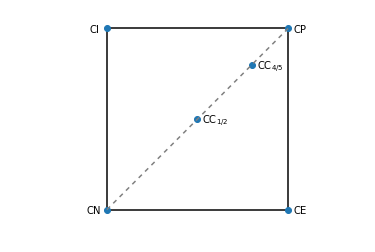

In [3]:
plt.axis('equal')
plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color='black')
plt.plot([0, 1, 0, 1, .5, .8], [0, 1, 1, 0, .5, .8], 'o')
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')
plt.text(-.07, 0, '$\mathrm{CN}$', horizontalalignment='center', verticalalignment='center')
plt.text(1.07, 1, '$\mathrm{CP}$', horizontalalignment='center', verticalalignment='center')
plt.text(-.07, 1, '$\mathrm{CI}$', horizontalalignment='center', verticalalignment='center')
plt.text(1.07, 0, '$\mathrm{CE}$', horizontalalignment='center', verticalalignment='center')
plt.text(.6, .487, '$\mathrm{CC}_{1/2}$', horizontalalignment='center', verticalalignment='center')
plt.text(.9, .787, '$\mathrm{CC}_{4/5}$', horizontalalignment='center', verticalalignment='center')
plt.xlim([-.1, 1.1])
plt.ylim([-.1, 1.1])
plt.axis('off')
plt.show()

Ovviamente nei casi reali non capiterà di imbattersi esattamente in questi classificatori, i quali ci permettono però di orientarci all'interno della rappresentazione grafica. Un classificatore sarà tanto più efficiente quanto più si colloca nella parte in alto a sinistra del quadrato. Eventuali classificatori che si collochino vicino al vertice in basso a destra possono facilmente essere convertiti in classificatori efficienti convertendo ogni classificazione positiva in una classificazione negativa e viceversa. Infine, classificatori che si collocano vicino alla diagonale sono essenzialmente indistinguibili da classificatori che effettuano la scelta tra le due classi in modo casuale.

<div id="h-5"></div>

## Classificatori a soglia

Un _classificatore a soglia_ effettua il procedimento di classificazione di un generico oggetto calcolando una quantità e verificando poi che quest'ultima sia superiore a una soglia prefissata. La quantità varierà ovviamente in funzione dell'oggetto considerato, mentre la soglia resterà uguale. Chiaramente, la costruzione di un tale tipo di classificatore richiede anche di fissare questo valore per la soglia. Gli indici di sensibilità e specificità possono essere utilizzati proprio per questo scopo: indicato con $\theta$ un generico valore per la soglia e individuato un intervallo $[\theta_\min, \theta_\max]$ in cui il valore può variare, si può considerare un'opportuna discretizzazione finita di tale intervallo (a meno che l'insieme dei valori considerabili non sia già discreto, finito e ragionevolmente piccolo) $D = \{ \theta_0 = \theta_\min, \dots, \theta_n = \theta_\max \}$. Per ogni $\theta \in D$ è poi possibile calcolare la sensibilità e la specificità del classificatore (va notato che è sufficiente costruire un'unica volta il classificatore a partire dai dati a disposizione, per poi variare via via la soglia) e disegnare sul piano cartesiano il punto corrispondente. Il risultato è una traiettoria che prende il nome di _curva ROC_, il cui andamento tipico è visualizzato nella figura che segue.

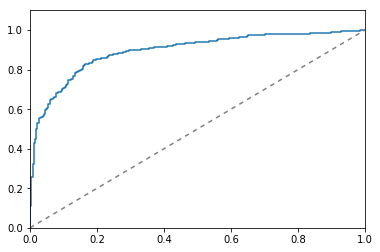

In [4]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
Xtrain = X[:9000]
Xtest = X[9000:]
ytrain = y[:9000]
ytest = y[9000:]

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

from sklearn import metrics

preds = clf.predict_proba(Xtest)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)

plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.show()

L'andamento di una curva ROC ha sempre l'origine e il punto $(1, 1)$ come estremi. Infatti quando la soglia assume rispettivamente i suoi valori minimo e massimo il classificatore ha un output costante: nel primo caso tutti gli esempi saranno associati alla classe positiva, nel secondo a quella negativa. Quindi si ottengono i classificatori $\mathrm{CP}$ e $\mathrm{CN}$ che si collocano appunto in corrispondenza di $(0, 0)$ e $(1, 1)$ nel grafico. Inoltre la curva è sempre monotona non decrescente, e ciò è dovuto al fatto che all'aumentare della soglia il numero di oggetti classificati positivamente può solo decrescere.

Il valore di $\theta$ può quindi essere scelto in modo da trovare un giusto compromesso tra sensibilità e specificità. Il grafico della curva ROC viene inoltre utilizzato per valutare la bontà del classificatore indipendentemente da uno specifico valore della soglia. Ciò viene fatto misurando l'area compresa tra l'asse delle ascisse e la curva stessa, area evidenziata nella figura che segue.

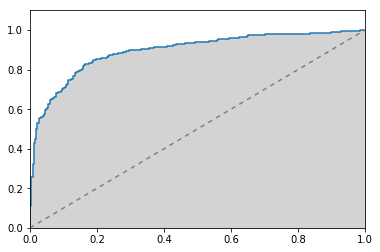

In [5]:
plt.figure()

plt.fill_between(fpr, [0]*len(tpr), tpr, color='lightgray')
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.show()

Il valore di tale area viene indicato con la sigla AUC (che corrisponde ad "Area Under the ROC Curve"): più si avvicina a $1$, più il classificatore ha un comportamento che approssima quello del caso ideale $\mathrm{CI}$.

Un caso speciale di classificatori a soglia è costituito dai cosiddetti _classificatori probabilistici_ che associano a un oggetto una stima della _probabilità_ che questo appartenga alle varie classi. Ancora non abbiamo approfondito che cosa sia la probabilità, ma per il momento possiamo affidarci all'accezione comune di tale termine: si tratta di una quantificazione numerica della confidenza con cui ci aspettiamo che si verifichi un evento. Nella maggior parte dei casi questa quantificazione è espressa tramite un numero che varia tra $0$ e $1$, dove $0$ indica la certezza assoluta che l'evento non si verificherà e $1$ indica la situazione opposta in cui si ha certezza assoluta che l'evento si verificherà.

Se nel problema considerato ci sono solo due classi (e in questi casi si parla di _classificazione binaria_), un classificatore probabilistico emetterà la sola probabilità di appartenenza alla classe positiva, nell'idea che l'appartenenza alla classe negativa si ottenga in modo complementare: se è bassa la probabilità che l'oggetto sia positivo, sarà alta quella di essere un oggetto negativo e viceversa.

Ipotizziamo di avere utilizzato cinque oggetti $x_1, \dots, x_5$, dei quali solo il secondo e il quinto non appartengono alla classe considerata, per costruire un classificatore binario a soglia. Ipotizziamo anche che tale classificatore associ i cinque oggetti, rispettivamente, alle probabilità $0.7$, $0.4$, $0.8$, $0.7$ e $0.3$. Se si vogliono convertire queste decisioni probabilistiche in associazioni esplicite degli oggetti alle classi, è possibile convertire il classificatore ottenuto in un classificatore a soglia, scegliendo un valore $s$ e associando un oggetto alla classe positiva se e solo se la probabilità corrispondente è maggiore o uguale a $s$. La tabella che segue mostra quali sarebbero le associazioni per sei scelte diverse per $s$ che corrispondono ai valori $0.2$, $0.4$, $0.6$, $0.8$ e $1$.

<table class="table">
  <tr>
    <th></th>
    <th>$y$</th>
    <th>$p$</th>
    <th>$s=0$</th>
    <th>$s=0.2$</th>
    <th>$s=0.4$</th>
    <th>$s=0.6$</th>
    <th>$s=0.8$</th>
    <th>$s=1$</th>
  </tr>
  <tr>
    <td>$x_1$</td>
    <td>$1$</td>
    <td>$0.7$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$0$</td>
    <td>$0$</td>
  </tr>
  <tr>
    <td>$x_2$</td>
    <td>$0$</td>
    <td>$0.4$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$0$</td>
    <td>$0$</td>
    <td>$0$</td>
  </tr>
  <tr>
    <td>$x_3$</td>
    <td>$1$</td>
    <td>$0.8$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$0$</td>
  </tr>
  <tr>
    <td>$x_4$</td>
    <td>$1$</td>
    <td>$0.7$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$0$</td>
    <td>$0$</td>
  </tr>
  <tr>
    <td>$x_5$</td>
    <td>$0$</td>
    <td>$0.3$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$0$</td>
    <td>$0$</td>
    <td>$0$</td>
    <td>$0$</td>
  </tr>
</table>

Osservando questa tabella è facile derivare le quantità alla base del calcolo di sensibilità e specificità. Il numero $\mathrm{TP}$ e $\mathrm{TN}$ degli oggetti positivi e negativi è pari rispettivamente al numero di $1$ e di $0$ nella colonna delle etichette $y$; inoltre, per un fissato valore di $s$ il numero $\mathrm{VP}$ di veri positivi è pari al numero di righe in cui l'etichetta e il valore della classificazione sono entrambi $1$, e analogamente il numero $\mathrm{FP}$ di falsi positivi equivarrà al numero di righe in cui l'etichetta $y$ vale $0$ mentre l'esito della classificazione vale $1$. 


<table class="table">
  <tr>
    <th></th>
    <th>$s=0$</th>
    <th>$s=0.2$</th>
    <th>$s=0.4$</th>
    <th>$s=0.6$</th>
    <th>$s=0.8$</th>
    <th>$s=1$</th>
  </tr>
  <tr>
    <th>$\frac{\mathrm{FP}}{\mathrm{TN}}$</th>
    <td>$\frac{2}{2}$</td>
    <td>$\frac{2}{2}$</td>
    <td>$\frac{2}{2}$</td>
    <td>$\frac{1}{2}$</td>
    <td>$0$</td>
    <td>$0$</td>
  </tr>
  <tr>
    <th>$\frac{\mathrm{VP}}{\mathrm{TP}}$</th>
    <td>$\frac{3}{3}$</td>
    <td>$\frac{3}{3}$</td>
    <td>$\frac{3}{3}$</td>
    <td>$\frac{3}{3}$</td>
    <td>$\frac{1}{3}$</td>
    <td>$0$</td>
  </tr>
</table>

La visualizzazione della corrispondente curva ROC può essere effettuata consdierando i valori nelle due righe di questa tabella ripsettivamente come ascisse e ordinate di punti che andranno poi uniti.

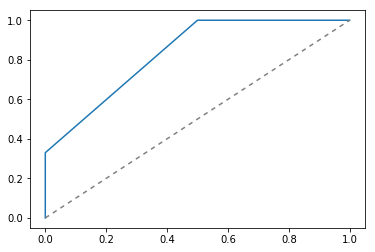

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot([1, 1, 1, 0.5, 0, 0], [1, 1, 1, 1, .33, 0])
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')
plt.show()

In realtà non è necessario tracciare questo tipo di curve "a mano". Il package sklearn mette a disposizione un oggetto `metrics` su cui invocare il metodo `roc_curve` che, in funzione delle etichette che individuano le classi degli oggetti e delle probabilità emesse dal classificatore determina automaticamente quali sono i valori sensati da considerare per la soglia sulla probabilità e restituisce due array contenente rispettivamente ascisse e ordinate dei punti da unire per ottenere la curva ROC.

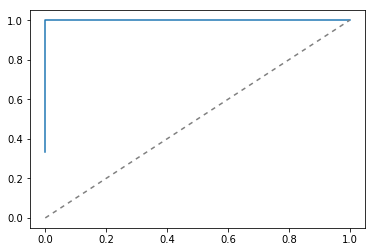

In [7]:
from sklearn import metrics
y = [1, 0, 1, 1, 0]
prob = [.7, .4, .8, .7, .3]
fpr, tpr, _ = metrics.roc_curve(y, prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')
plt.show()

<div class="alert alert-info">
Come è possibile vedere analizzando il codice nella cella precedente, il metodo `roc_curve` restituisce tre valori: il terzo, non considerato nel nostro caso (il simbolo `_` ci permette di non dover creare una variabile fittizia che poi non verrebbe utilizzata) permette di ottenere i sopra citati valori di soglia selezionati dal metodo.
</div>

L'oggetto `metrics` permette anche di calcolare il valore AUC corrispondente all'area sotto la curva ROC, invocando il metodo `auc` a cui passare i due array precedentemente ottenuti.

In [8]:
metrics.auc(fpr,tpr)

1.0

Il risultato ottenuto è coerente con il grafico della curva e con i valori di probabilità originali, che sono tutti coerenti con le etichette da predire. In effetti, la curva ottenuta ci indica che il classificatore è ideale e, di conseguenza, il valore di AUC è $1$.

Se i valori di probabilità per i medesimi oggetti fossero invece $0.2$, $0.4$, $0.8$, $0.7$ e $0.7$ (con una degradazione delle prestazioni relativamente al primo e all'ultimo oggetto), si otterrebbe ovviamente una diversa curva ROC.

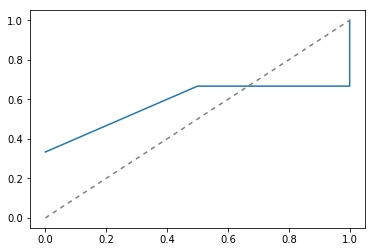

In [9]:
y = [1, 0, 1, 1, 0]
prob = [.2, .4, .8, .7, .7]
fpr, tpr, _ = metrics.roc_curve(y, prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')
plt.show()

Il decadimento delle prestazioni si può osservare in maniera più diretta calcolando il valore per l'AUC, che in questo caso è non molto superiore al valore corrispondente a una scelta uniformemente casuale.

In [10]:
metrics.auc(fpr,tpr)

0.5833333333333333

Consideriamo un esempio più complesso, rivisitando quanto visto relativamente agli alberi di decisione. Iniziamo caricando il dataset dei supereroi, eliminando tutti i casi in cui l'editore non è `'Marvel Comics'` oppure `'DC Comics'`. Focalizziamo poi l'attenzione su alcune delle colonne, trasformando i valori categorici in valori numerici.

In [12]:
import pandas as pd

heroes = pd.read_csv('data/heroes.csv', sep=';', index_col=0).dropna()
heroes = heroes[heroes['Publisher'].isin(['Marvel Comics', 'DC Comics'])]

features = ['Height', 'Weight', 'Gender', 'First appearance',
            'Hair color', 'Eye color', 'Strength', 'Intelligence']

from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
gender_encoder.fit(heroes['Gender'])

eye_col_encoder = LabelEncoder()
eye_col_encoder.fit(heroes['Eye color'])

hair_col_encoder = LabelEncoder()
hair_col_encoder.fit(heroes['Hair color'])

intelligence_encoder = LabelEncoder()
_ = intelligence_encoder.fit(heroes['Intelligence'])

heroes['Gender'] = gender_encoder.transform(heroes['Gender'])
heroes['Eye color'] = eye_col_encoder.transform(heroes['Eye color'])
heroes['Hair color'] = hair_col_encoder.transform(heroes['Hair color'])
heroes['Intelligence'] = intelligence_encoder.transform(heroes['Intelligence'])

Nell'idea di costruire un classificatore che associa i supereroi a una tra le due case editrici, estraiamo le colonne per ottenre l'insieme degli oggetti e parimenti costruiamo la serie delle etichette corrispondenti, i cui valori vanno trasformati da categorici a numerici.

In [13]:
X = heroes[features]
Y = heroes['Publisher']

publisher_encoder = LabelEncoder()
publisher_encoder.fit(Y)
Y = publisher_encoder.transform(Y)

Il passo successivo consiste nel dividere gli oggetti a disposizione e le corrispondenti etichette in due gruppi: uno per costruire il classificatore e uno per valutarne l'efficacia in termini di curva ROC. Usando infatti dei dati nuovi per valuare un classificatore si cattura meglio la sua capacità di funzionare correttamente quando questo verrà utilizzato su oggetti di cui non si conosce la classe di appartenenza.

In [14]:
num_train = 110
X_train = X[:num_train]
X_test = X[num_train:]
Y_train = Y[:num_train]
Y_test = Y[num_train:]

Utilizzando la classe `DecisionTreeClassifier` vista in precedenza è quindi possibile ottenere l'albero di decisione che ci interessa. Il risultato ottenuto può sia assegnare un oggetto a una specifica classe (cosa che abbiamo finora fatto invocando il metodo `predict`), sia stimare la probabilità che questo oggetto appartenga alle due classi considerate: ciò si ottiene invocando il metodo `predict_proba` che restituirà in questo caso una lista con due valori che corrispondono rispettivamente alla probabilità di essere editi da Marvel o da DC. Considerando solo il primo di questi due valori si può facilmente procedere come prima e tracciare la corrispondente curva ROC.

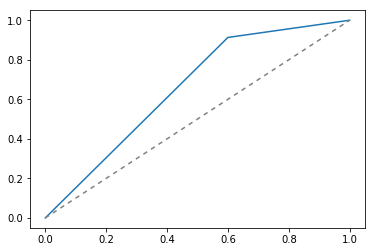

In [15]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')
plt.show()

Il risultato ottenuto è relativamente (ma non troppo) lontano dalla diagonale associata ai classificatori casuali, così come risulta anche evidenziato dal corrispondente valore di AUC.

In [17]:
auc = metrics.auc(fpr,tpr)
print(auc)

0.6565217391304348


<hr style="width: 90%;" align="left" />
<span style="font-size: 0.8rem;">D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Analisi di classificatori, 2017.</span>
<br>
<span style="font-size: 0.8rem;">Powered by <img src="img/jupyter-logo.png" style="height: 1rem; display: inline; margin-left: 0.5ex; margin-top: 0;" alt="Jupyter Notebook"></span>
<div style="float: left; margin-top: 1ex;">
<img src="http://mirrors.creativecommons.org/presskit/icons/cc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/by.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nd.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<span style="font-size: 0.7rem; line-height: 0.7rem; vertical-align: middle;">Quest'opera è distribuita con Licenza <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribuzione - Non commerciale - Non opere derivate 4.0 Internazionale</a></span>.
</div>